# Classificadores

In [75]:
#imports
import os

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics                


In [2]:
# Set the figure size
plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

# KNN 

<img src='https://machinelearningknowledge.ai/wp-content/uploads/2018/08/KNN-Classification.gif'>

## Teste 1 com o KNN

In [3]:
#dataset 1 - balanceado; linearmente separavel, sem outliers; normalizado 
classe_1 = pd.DataFrame(np.random.normal(3, 2.5, size=(10, 2)))
classe_1['clase'] = 0
classe_1.columns=['feature_1', 'feature_2', 'classe']
classe_2 = pd.DataFrame(np.random.normal(20, 2, size=(10, 2)))
classe_2['clase'] = 1
classe_2.columns=['feature_1', 'feature_2', 'classe']
sample = pd.concat([classe_1, classe_2])
sample

,feature_1,feature_2,classe
0,4.399038,1.570883,0
1,4.154722,-0.234249,0
2,3.347447,2.034107,0
3,4.376267,5.153772,0
4,1.047575,1.382727,0
5,2.321226,-0.866871,0
6,2.225348,3.422347,0
7,4.316371,2.937276,0
8,3.622764,4.028104,0
9,1.104392,4.151042,0


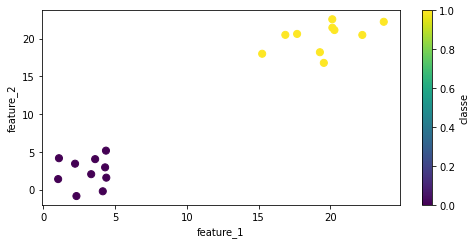

In [4]:
fig, ax = plt.subplots()
sample.plot(kind="scatter", x="feature_1", y="feature_2", s=50, c="classe", cmap="viridis", ax=ax);


In [5]:
X = sample[['feature_1', 'feature_2']]
y = sample['classe']

In [6]:
#instanciação e fit 
neigh = KNeighborsClassifier(n_neighbors= 1)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [7]:
sample

,feature_1,feature_2,classe
0,4.399038,1.570883,0
1,4.154722,-0.234249,0
2,3.347447,2.034107,0
3,4.376267,5.153772,0
4,1.047575,1.382727,0
5,2.321226,-0.866871,0
6,2.225348,3.422347,0
7,4.316371,2.937276,0
8,3.622764,4.028104,0
9,1.104392,4.151042,0


In [8]:
print(neigh.predict([[20.33, 22.58]]))

[1]


In [9]:
print(neigh.predict([[5.16, 3.9]]))

[0]


In [10]:
print(neigh.predict([[15.16, 15.3]]))

[1]


## Teste 2

In [78]:
#dataset 2 - desbalanceado; linearmente separavel, sem outliers; normalizado 
classe_1 = pd.DataFrame(np.random.normal(3, 2.5, size=(90, 2)))
classe_1['clase'] = 0
classe_1.columns=['feature_1', 'feature_2', 'classe']
classe_2 = pd.DataFrame(np.random.normal(20, 2, size=(10, 2)))
classe_2['clase'] = 1
classe_2.columns=['feature_1', 'feature_2', 'classe']
sample_2 = pd.concat([classe_1, classe_2])
sample_2

,feature_1,feature_2,classe
0,4.028045,5.186207,0
1,3.398332,7.285167,0
2,8.449866,1.658583,0
3,-0.466489,5.913600,0
4,-2.020860,6.439360,0
...,...,...,...
5,21.877399,20.378449,1
6,23.870714,23.558728,1
7,19.938155,21.272124,1
8,19.878768,17.608124,1


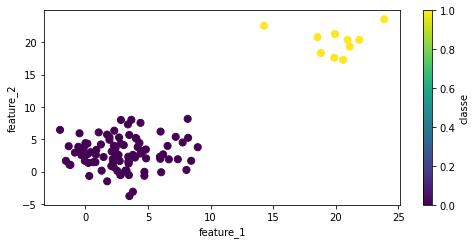

In [79]:
fig, ax = plt.subplots()
sample_2.plot(kind="scatter", x="feature_1", y="feature_2", s=50, c="classe", cmap="viridis", ax=ax);


In [80]:
X = sample_2[['feature_1', 'feature_2']]
y = sample_2['classe']

In [81]:
#instanciação e fit 
neigh = KNeighborsClassifier(n_neighbors= 50)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=50)

In [82]:
print(neigh.predict([[20.33, 22.58]]))

[0]


In [83]:
print(neigh.predict([[5.16, 3.9]]))

[0]


In [84]:
print(neigh.predict([[15.16, 15.3]]))

[0]


### Encontrar o melhor valor de K 

In [86]:
k= 50
acc_array=np.zeros(k)
for k in np.arange(1,k+1,1): # here k will take values from 1 to 10
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X,y) # k changes after each iteration
    y_pred = classifier.predict(X)
    acc = metrics.accuracy_score(y, y)
    acc_array[k-1]=acc # store correctly the results

max_acc=np.amax(acc_array)
acc_list=list(acc_array)
k=acc_list.index(max_acc)
print("The best accuracy was with", max_acc, "with k=", k+1)


The best accuracy was with 1.0 with k= 1


## Teste 3

In [87]:
#dataset 1 - balanceado; linearmente separavel, com outliers; normalizado 
classe_1 = pd.DataFrame(np.random.normal(3, 2.5, size=(10, 2)))


classe_1['clase'] = 0
classe_1.columns=['feature_1', 'feature_2', 'classe']

classe_2 = pd.DataFrame(np.random.normal(20, 2, size=(10, 2)))
classe_2['clase'] = 1
classe_2.columns=['feature_1', 'feature_2', 'classe']
outlier = {'feature_1':11, 'feature_2':42, 'classe':1}
classe_2 = classe_2.append(outlier, ignore_index=True)
sample_3 = pd.concat([classe_1, classe_2])
sample_3

,feature_1,feature_2,classe
0,9.999645,4.178565,0
1,2.473642,4.046731,0
2,0.301930,1.146305,0
3,4.063091,0.559343,0
4,1.884518,-2.357116,0
5,2.357057,-2.070730,0
6,1.893943,4.445390,0
7,2.074044,5.658898,0
8,4.923764,3.422491,0
9,11.685439,0.252817,0


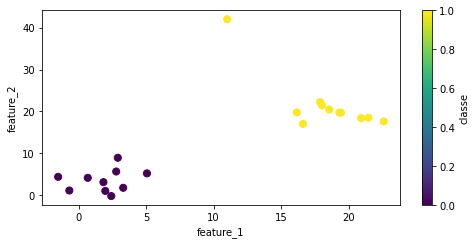

In [19]:
fig, ax = plt.subplots()
sample_3.plot(kind="scatter", x="feature_1", y="feature_2", s=50, c="classe", cmap="viridis", ax=ax);

In [20]:
X = sample_3[['feature_1', 'feature_2']]
y = sample_3['classe']

In [21]:
#instanciação e fit 
neigh = KNeighborsClassifier(n_neighbors= 1)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [22]:
print(neigh.predict([[20.33, 22.58]]))

[1]


In [23]:
print(neigh.predict([[5.16, 3.9]]))

[0]


In [24]:
print(neigh.predict([[15.16, 15.3]]))

[1]


## Teste 4 

In [25]:
#dataset 1 - balanceado; linearmente separavel, sem outliers; desnormalizado 
classe_1 = pd.DataFrame(np.random.normal(3, 2.5, size=(10, 2)))
classe_1['clase'] = 0
classe_1.columns=['feature_1', 'feature_2', 'classe']

classe_2 = pd.DataFrame(np.random.normal(20, 2, size=(10, 2)))
classe_2['clase'] = 1
classe_2.columns=['feature_1', 'feature_2', 'classe']

sample_4 = pd.concat([classe_1, classe_2])
sample_4['feature_2'] = sample_4['feature_2'] + 1000 
sample_4

,feature_1,feature_2,classe
0,3.153821,1003.855685,0
1,3.208886,1002.248246,0
2,0.578313,1000.933255,0
3,-0.299889,1005.513687,0
4,0.483491,1004.944196,0
5,0.241435,1003.191782,0
6,0.282466,1006.205314,0
7,5.376495,998.279993,0
8,2.997951,1003.249544,0
9,2.708852,1003.752478,0


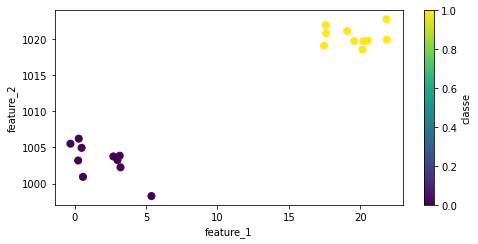

In [26]:
fig, ax = plt.subplots()
sample_4.plot(kind="scatter", x="feature_1", y="feature_2", s=50, c="classe", cmap="viridis", ax=ax);

In [27]:
X = sample_3[['feature_1', 'feature_2']]
y = sample_3['classe']

In [28]:
#instanciação e fit 
neigh = KNeighborsClassifier(n_neighbors= 1)
neigh.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

In [29]:
print(neigh.predict([[20.33, 1022.58]]))

[1]


In [30]:
print(neigh.predict([[5.16, 1003.9]]))

[1]


In [31]:
print(neigh.predict([[1015.16, 1015.3]]))

[1]


# Regressão Logistica 

https://medium.com/@msremigio/regress%C3%A3o-log%C3%ADstica-logistic-regression-997c6259ff9a

<img src='https://miro.medium.com/max/629/1*QP7Mp-DkgdoNf0S6XYNtZQ.png'>

## Teste 1

In [32]:
# dataset 1 - sem multicolinearidade 

classe_1 = pd.DataFrame(np.random.normal(3, 2.5, size=(10, 2)))
classe_1['clase'] = 0
classe_1.columns=['feature_1', 'feature_2', 'classe']
classe_2 = pd.DataFrame(np.random.normal(20, 2, size=(10, 2)))
classe_2['clase'] = 1
classe_2.columns=['feature_1', 'feature_2', 'classe']
sample = pd.concat([classe_1, classe_2])
sample


,feature_1,feature_2,classe
0,-0.454398,5.566193,0
1,2.496831,4.927231,0
2,3.636883,1.923593,0
3,4.488513,1.533803,0
4,0.325661,1.357372,0
5,0.148527,3.159484,0
6,4.879857,1.872282,0
7,6.392701,4.043993,0
8,7.154270,5.147340,0
9,4.198230,-1.071576,0


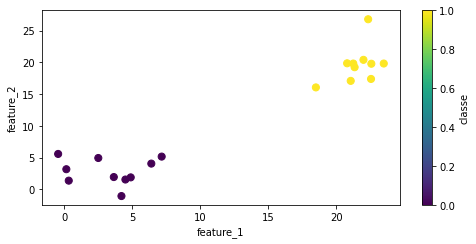

In [33]:
fig, ax = plt.subplots()
sample.plot(kind="scatter", x="feature_1", y="feature_2", s=50, c="classe", cmap="viridis", ax=ax);

In [34]:
X = sample[['feature_1', 'feature_2']]
y = sample['classe']
clf = LogisticRegression(random_state=0).fit(X, y)

In [35]:
X

,feature_1,feature_2
0,-0.454398,5.566193
1,2.496831,4.927231
2,3.636883,1.923593
3,4.488513,1.533803
4,0.325661,1.357372
5,0.148527,3.159484
6,4.879857,1.872282
7,6.392701,4.043993
8,7.154270,5.147340
9,4.198230,-1.071576


In [36]:
print(clf.predict([[20.33, 19.7]]))

print(clf.predict_proba([[20.33, 19.7]]))

print(clf.score(X, y))



[1]
[[0.0020063 0.9979937]]
1.0


In [37]:
clf.coef_

array([[0.39464715, 0.36431994]])

## Teste 2

In [38]:
cov = np.array([[6, -3], [-3, 3.5]])
pts = pd.DataFrame(np.random.multivariate_normal([0, 0], cov, size=100))
pts

,0,1
0,1.837877,-2.606953
1,-1.565733,3.289942
2,0.351237,1.390928
3,3.212827,2.544058
4,3.476596,-1.845195
...,...,...
95,-2.034274,-0.178253
96,-2.484484,2.509738
97,-3.873536,1.665202
98,3.810552,0.184643


In [39]:
# dataset 1 - com multicolinearidade 
cov = np.array([[6, -3], [-3, 3.5]])
cov2 = np.array([[1, 0], [0, 1]])

classe_1 = pd.DataFrame(np.random.multivariate_normal([0, 0], cov, size=100))
classe_1['clase'] = 0
classe_1.columns=['feature_1', 'feature_2', 'classe']

classe_2 = pd.DataFrame(np.random.multivariate_normal([10, 20], cov=cov2, size=100))
classe_2['clase'] = 1
classe_2.columns=['feature_1', 'feature_2', 'classe']
sample_2 = pd.concat([classe_1, classe_2])
sample_2

,feature_1,feature_2,classe
0,-2.557418,1.737762,0
1,-0.283484,-0.835154,0
2,0.389095,0.390764,0
3,0.265031,1.177685,0
4,2.947943,-2.383656,0
...,...,...,...
95,9.103026,20.629422,1
96,9.666527,19.528650,1
97,9.713591,19.548084,1
98,9.478560,20.008402,1


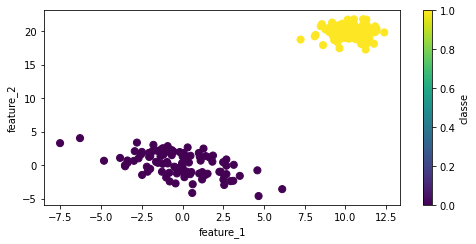

In [40]:
fig, ax = plt.subplots()
sample_2.plot(kind="scatter", x="feature_1", y="feature_2", s=50, c="classe", cmap="viridis", ax=ax);

In [41]:
X = sample_2[['feature_1', 'feature_2']]
y = sample_2['classe']
clf = LogisticRegression(random_state=0).fit(X, y)

In [42]:
print(clf.predict([[0, 10]]))

print(clf.predict_proba([[0, 10]]))

print(clf.score(X, y))

[0]
[[0.86588363 0.13411637]]
1.0


In [43]:
print(clf.predict([[10, 20]]))

print(clf.predict_proba([[10, 20]]))

print(clf.score(X, y))

[1]
[[2.73307507e-04 9.99726692e-01]]
1.0


In [44]:
print(clf.predict([[0, 20]]))

print(clf.predict_proba([[0, 20]]))

print(clf.score(X, y))

[1]
[[0.0092116 0.9907884]]
1.0


In [45]:
clf.coef_

array([[0.3526602 , 0.65430803]])

https://blog.minitab.com/pt/basta-lidando-com-a-multicolinearidade-na-analise-de-regressao

# SVM 

<img src='https://jeremykun.com/wp-content/uploads/2017/06/svm_solve_by_hand-e1496076457793.gif?w=640'>

In [46]:
#dataset 1 - balanceado; linearmente separavel, sem outliers; normalizado 
classe_1 = pd.DataFrame(np.random.normal(3, 2.5, size=(10, 2)))
classe_1['clase'] = 0
classe_1.columns=['feature_1', 'feature_2', 'classe']
classe_2 = pd.DataFrame(np.random.normal(20, 2, size=(10, 2)))
classe_2['clase'] = 1
classe_2.columns=['feature_1', 'feature_2', 'classe']
sample = pd.concat([classe_1, classe_2])
sample

,feature_1,feature_2,classe
0,0.771625,1.671698,0
1,2.678427,10.561148,0
2,3.843639,-0.626518,0
3,2.582546,2.265947,0
4,1.306245,4.687469,0
5,1.230296,1.673381,0
6,2.314510,3.105928,0
7,0.128061,5.694670,0
8,2.883261,1.786190,0
9,2.303890,5.338210,0


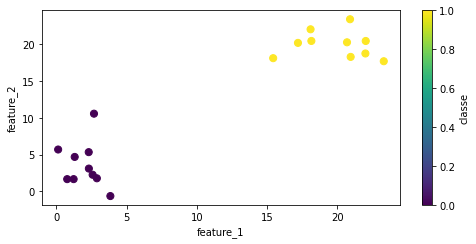

In [47]:
fig, ax = plt.subplots()
sample.plot(kind="scatter", x="feature_1", y="feature_2", s=50, c="classe", cmap="viridis", ax=ax);

In [48]:
X = sample[['feature_1', 'feature_2']]
y = sample['classe']

In [49]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [50]:
print(clf.predict([[20, 20]]))

print(clf.score(X, y))

[1]
1.0


## Teste 2

In [51]:
#dataset 2 - balanceado; não linearmente separavel, sem outliers; normalizado 
classe_1 = pd.DataFrame(np.random.normal(3, 2.5, size=(10, 2)))
classe_1['clase'] = 0
classe_1.columns=['feature_1', 'feature_2', 'classe']
classe_2 = pd.DataFrame(np.random.normal(5, 2, size=(10, 2)))
classe_2['clase'] = 1
classe_2.columns=['feature_1', 'feature_2', 'classe']
sample_2 = pd.concat([classe_1, classe_2])
sample_2

,feature_1,feature_2,classe
0,2.151147,6.220850,0
1,-1.289349,6.698268,0
2,3.470918,3.871096,0
3,3.190876,1.292388,0
4,0.211045,1.244881,0
5,3.907782,5.188320,0
6,1.649857,0.607420,0
7,0.112025,2.414939,0
8,5.565401,5.024268,0
9,3.304095,5.589590,0


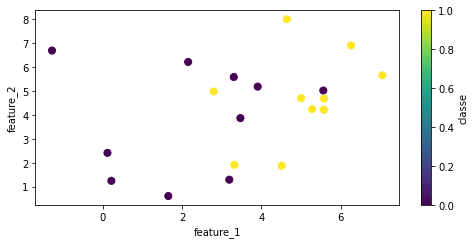

In [52]:
fig, ax = plt.subplots()
sample_2.plot(kind="scatter", x="feature_1", y="feature_2", s=50, c="classe", cmap="viridis", ax=ax);

In [53]:
X = sample_2[['feature_1', 'feature_2']]
y = sample_2['classe']

In [54]:
clf = SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [55]:
sample_2

,feature_1,feature_2,classe
0,2.151147,6.220850,0
1,-1.289349,6.698268,0
2,3.470918,3.871096,0
3,3.190876,1.292388,0
4,0.211045,1.244881,0
5,3.907782,5.188320,0
6,1.649857,0.607420,0
7,0.112025,2.414939,0
8,5.565401,5.024268,0
9,3.304095,5.589590,0


In [56]:
print(clf.predict([[7, 4.29]]))

print(clf.score(X, y))

[1]
0.8


In [57]:
clf = SVC(kernel='rbf', gamma='auto')
clf.fit(X, y)

SVC(gamma='auto')

In [58]:
print(clf.predict([[7, 4.29]]))

print(clf.score(X, y))

[1]
0.9


# Decision Tree 

<img src='https://miro.medium.com/max/1218/1*_DXeoBPTDu6fP_EMzTbnnA.png'>

In [59]:
#dataset 2 - balanceado;  linearmente separavel, sem outliers; normalizado 
classe_1 = pd.DataFrame(np.random.normal(3, 2.5, size=(10, 2)))
classe_1['clase'] = 0
classe_1.columns=['feature_1', 'feature_2', 'classe']
classe_2 = pd.DataFrame(np.random.normal(20, 2, size=(10, 2)))
classe_2['clase'] = 1
classe_2.columns=['feature_1', 'feature_2', 'classe']
sample = pd.concat([classe_1, classe_2])
sample

,feature_1,feature_2,classe
0,3.857495,3.217324,0
1,2.634518,6.042329,0
2,0.820729,3.726966,0
3,2.839257,0.869422,0
4,1.282648,1.792372,0
5,-0.481604,-0.638502,0
6,2.539198,-1.472042,0
7,7.647689,2.887642,0
8,1.614328,1.186725,0
9,-0.052782,1.247450,0


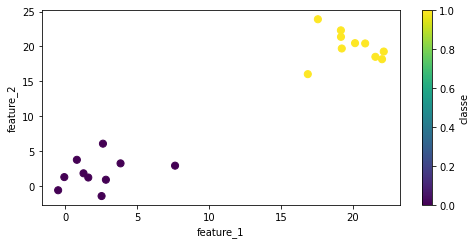

In [60]:
fig, ax = plt.subplots()
sample.plot(kind="scatter", x="feature_1", y="feature_2", s=50, c="classe", cmap="viridis", ax=ax);

In [61]:
X =  sample[['feature_1', 'feature_2']]
y = sample['classe']

In [62]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [63]:
clf.predict([[2., 2.]])

array([0])

In [64]:
clf.predict([[25., 18.]])

array([1])

## Teste 2 

In [65]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [66]:
clf.predict([[2., 2.]])

array([0])

In [67]:
clf.predict([[25., 18.]])

array([1])

# Random Forest 

<img src='https://1.bp.blogspot.com/-Ax59WK4DE8w/YK6o9bt_9jI/AAAAAAAAEQA/9KbBf9cdL6kOFkJnU39aUn4m8ydThPenwCLcBGAsYHQ/s0/Random%2BForest%2B03.gif'>

<img src='https://www.researchgate.net/publication/351175730/figure/fig6/AS:1023275480141832@1620979294225/Principle-of-a-random-forest-RF-Bagging-is-the-process-of-data-sampling-from-a.png'>

In [68]:
#dataset 2 - balanceado;  linearmente separavel, sem outliers; normalizado 
classe_1 = pd.DataFrame(np.random.normal(3, 2.5, size=(10, 2)))
classe_1['clase'] = 0
classe_1.columns=['feature_1', 'feature_2', 'classe']
classe_2 = pd.DataFrame(np.random.normal(20, 2, size=(10, 2)))
classe_2['clase'] = 1
classe_2.columns=['feature_1', 'feature_2', 'classe']
sample = pd.concat([classe_1, classe_2])
sample

,feature_1,feature_2,classe
0,2.065389,0.526986,0
1,1.301825,3.774333,0
2,3.381413,4.136864,0
3,3.645669,5.177851,0
4,2.787615,6.727607,0
5,1.906787,-1.130197,0
6,0.568445,1.998332,0
7,2.701157,0.126336,0
8,2.009545,-0.184204,0
9,3.875127,2.020920,0


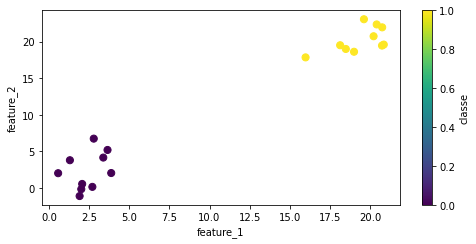

In [69]:
fig, ax = plt.subplots()
sample.plot(kind="scatter", x="feature_1", y="feature_2", s=50, c="classe", cmap="viridis", ax=ax);

In [70]:
X =  sample[['feature_1', 'feature_2']]
y = sample['classe']

In [71]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

RandomForestClassifier(max_depth=2, random_state=0)

In [72]:
print(clf.predict([[15, 20]]))

[1]
